In [1]:
import sys, os
os.path.dirname(sys.executable)

'/clusterfs/nilah/sergio/miniconda3/envs/ESM_cambrian/bin'

In [83]:
sys.path.append('/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/')
from ESMCBA.imports import *
from ESMCBA import graph_utils
from ESMCBA import other_utils
import importlib
importlib.reload(other_utils)

<module 'ESMCBA.other_utils' from '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/ESMCBA/other_utils.py'>

In [23]:
evaluations_dt = other_utils.get_all_evaluations('/global/scratch/users/sergiomar10/losses/ESMCBA_21032025/*.csv')
evaluations_dt.to_csv('../performances/models_performances_21032025.csv')

In [5]:
evaluations_dt = pd.read_csv('../performances/models_performances_21032025.csv')
evaluations_dt = evaluations_dt.sort_values(by='spearman', ascending = False).reset_index(drop=True)

In [76]:
evaluations_dt = evaluations_dt.sort_values(by='spearman', ascending = False).reset_index(drop=True)

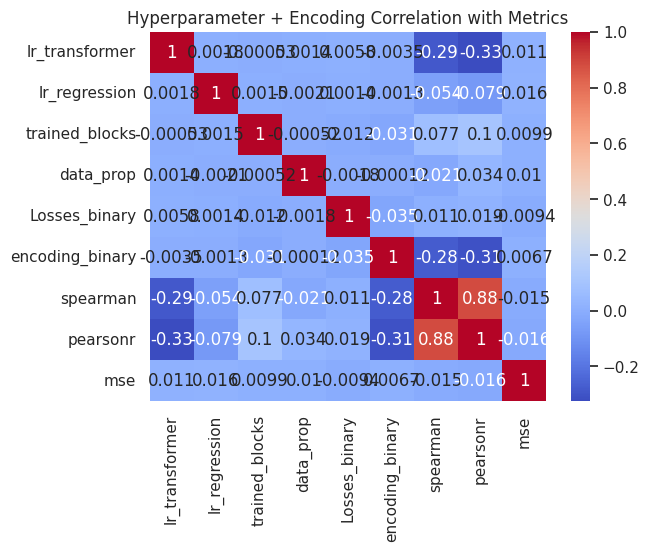

Encoding vs Spearman correlation: -0.275 (p = 4.95e-239)


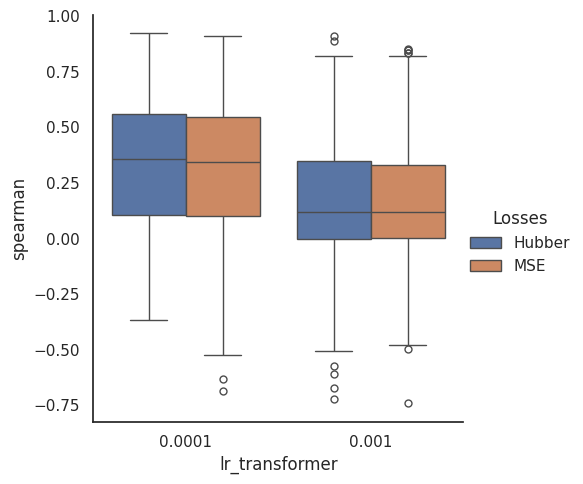

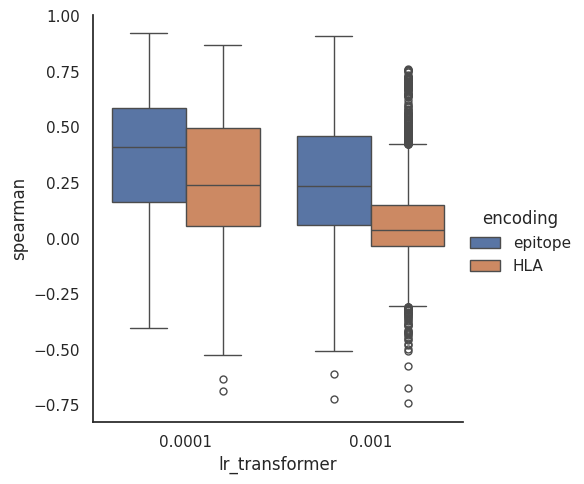

In [219]:
# Copy the DataFrame
df_corr = evaluations_dt.copy()

# Convert 'encoding' to binary (e.g., epitope=0, HLA=1)
df_corr['Losses_binary'] = df_corr['Losses'].map({'MSE': 0, 'Hubber': 1})

# Convert 'encoding' to binary (e.g., epitope=0, HLA=1)
df_corr['encoding_binary'] = df_corr['encoding'].map({'epitope': 0, 'HLA': 1})

# Select numeric columns
numeric_hyperparams = df_corr[[
    'lr_transformer', 'lr_regression', 'trained_blocks', 'data_prop', 'Losses_binary',
    'encoding_binary', 'spearman', 'pearsonr', 'mse'
]].astype(float)

# Compute correlation matrix
correlation_matrix = numeric_hyperparams.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Hyperparameter + Encoding Correlation with Metrics")
plt.show()


from scipy.stats import pointbiserialr
# Point-biserial correlation
r, p = pointbiserialr(df_corr['encoding_binary'], df_corr['spearman'])
print(f"Encoding vs Spearman correlation: {r:.3f} (p = {p:.3g})")


sns.catplot(data=evaluations_dt, x='lr_transformer', y='spearman', hue='Losses', kind='box')
sns.catplot(data=evaluations_dt, x='lr_transformer', y='spearman', hue='encoding', kind='box')

In [220]:
evaluations_dt_sorted = evaluations_dt[(evaluations_dt['Losses'] == 'MSE')].drop_duplicates('HLA') #[evaluations_dt['Losses'] == 'MSE']
evaluations_dt_sorted.head() #.sort_values(by='mse', ascending = False, inplace = True)

,HLA,Losses,encoding,data_prop,trained_blocks,lr_transformer,lr_regression,n_evaluations,spearman,pearsonr,mse,mae,r2,rmse,time,path
1,HLAA1101,MSE,epitope,0.95,30,0.0001,1e-06,12,0.909091,0.678370,6.369563,2.461298,-4.312960,2.523799,2025-03-22 13:32:40,/global/scratch/users/sergiomar10/losses/ESMCB...
26,HLAA3001,MSE,HLA,0.95,30,0.0001,1e-05,414,0.824524,0.888686,1.295031,0.965137,0.636321,1.137994,2025-03-22 13:16:04,/global/scratch/users/sergiomar10/losses/ESMCB...
27,HLAB3901,MSE,HLA,0.8,30,0.0001,0.001,13,0.818681,0.813469,1.745716,1.114540,-0.394526,1.321256,2025-03-22 09:54:39,/global/scratch/users/sergiomar10/losses/ESMCB...
78,HLAA0203,MSE,epitope,0.5,20,0.0001,1e-05,2602,0.799350,0.857516,0.993388,0.791989,0.672105,0.996688,2025-03-21 16:04:49,/global/scratch/users/sergiomar10/losses/ESMCB...
219,HLAA0206,MSE,HLA,0.5,30,0.0001,1e-06,2166,0.776667,0.813685,1.278637,0.926492,0.576863,1.130768,2025-03-21 22:35:56,/global/scratch/users/sergiomar10/losses/ESMCB...


In [141]:
import importlib
importlib.reload(other_utils)
other_utils.mhcflurry_predict(evaluations_dt_sorted)

Saved 12 peptides for allele HLA-A1101 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A1101.pep
Saved 414 peptides for allele HLA-A3001 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A3001.pep
Saved 2602 peptides for allele HLA-A0203 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A0203.pep
Saved 2194 peptides for allele HLA-A0206 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A0206.pep
Saved 484 peptides for allele HLA-B3501 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-B3501.pep
Saved 1837 peptides for allele HLA-A0202 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A0202.pep
Saved 1521 peptides for allele HLA-A6801 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A6801.pep
Saved 808 peptides for allele HLA-A2403 in /global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A2403.pep
Saved 1606 peptides f

In [222]:
netmhc_dir = "/global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/"

merged_dfs_by_HLA = {}
combined_metrics = []

# Define a helper function to compute PPV
def compute_ppv(y_true, y_pred, threshold=np.log10(500)):
    """
    Given a true affinity and predicted affinity (both in nM),
    compute the Positive Predictive Value (PPV).
    y_true <= threshold means a true binder; y_pred <= threshold means a predicted binder.
    """
    true_binders = (y_true <= threshold)
    pred_binders = (y_pred <= threshold)
    TP = np.logical_and(true_binders, pred_binders).sum()
    FP = np.logical_and(~true_binders, pred_binders).sum()
    if (TP + FP) == 0:
        return np.nan
    else:
        return TP / (TP + FP)

for HLA, path in evaluations_dt_sorted[['HLA', 'path']].values:
    try:
        formatted_HLA = HLA.replace('HLA', 'HLA-')  # e.g., HLAA1101 -> HLA-A1101
        replicate_spearman = []
        replicate_pearson = []
        replicate_ppv = []  # PPV across replicates for Fine-tuned ESMC
        
        # Get all replicate CSV files
        file_paths = glob.glob(f'{path[:155]}*')
        print(f"{len(file_paths)} replicates for {formatted_HLA}")

        # Load MHC Flurry predictions
        mhc_pred = pd.read_csv(
            f'/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/{formatted_HLA}_mhc_flurry.csv'
        )

        # Load NetMHCpan predictions for this specific HLA
        netmhc_file = f'{netmhc_dir}{formatted_HLA}_netmhc.xls'
        netmhc_hla = pd.read_csv(netmhc_file, sep='\t', header=1)
        # Assume 'Affinity(nM)' column for affinity; adjust if needed (e.g., 'nM', 'IC50')
        netmhc_hla['netmhc_log'] = netmhc_hla['BA_Rank'] #.apply(np.log10)

        label = formatted_HLA

        # Loop over each replicate CSV file for Fine-tuned ESMC predictions
        for rep_path in file_paths:
            last_csv = pd.read_csv(rep_path)

            # Adjust sequence if needed
            if len(last_csv['sequence'].iloc[0]) > 300:
                last_csv['sequence'] = last_csv['sequence'].apply(lambda x: x[365:])
                merged_df = pd.merge(last_csv, mhc_pred, left_on='sequence', right_on='peptide', how='left')
                if merged_df['peptide'].notna().sum() == 0:
                    last_csv['sequence'] = last_csv['sequence'].apply(lambda x: x[362:])
                    merged_df = pd.merge(last_csv, mhc_pred, left_on='sequence', right_on='peptide', how='left')
            else:
                merged_df = pd.merge(last_csv, mhc_pred, left_on='sequence', right_on='peptide', how='left')

            # Merge with NetMHCpan predictions (assume 'Peptide' column in NetMHCpan data)
            merged_df = pd.merge(merged_df, netmhc_hla[['Peptide', 'netmhc_log']], 
                               left_on='sequence', right_on='Peptide', how='left')

            # Compute log-transformed MHC affinity and filter
            merged_df['mhc_log'] = merged_df['mhcflurry_affinity'].apply(np.log10)
            merged_df = merged_df[merged_df['mhc_log'].notna() & merged_df['netmhc_log'].notna()]

            # Compute correlation metrics for Fine-tuned ESMC
            sp, _ = spearmanr(merged_df['measured'], merged_df['prediction'])
            pr, _ = pearsonr(merged_df['measured'], merged_df['prediction'])
            replicate_spearman.append(sp)
            replicate_pearson.append(pr)
            ppv_val = compute_ppv(merged_df['measured'], merged_df['prediction'])
            replicate_ppv.append(ppv_val)

        # Store merged_df
        merged_dfs_by_HLA[formatted_HLA] = merged_df

        # Compute mean and std for Fine-tuned ESMC
        esmc_sp_mean = np.mean(replicate_spearman) if replicate_spearman else np.nan
        esmc_sp_std  = np.std(replicate_spearman)  if replicate_spearman else np.nan
        esmc_pr_mean = np.mean(replicate_pearson)  if replicate_pearson else np.nan
        esmc_pr_std  = np.std(replicate_pearson)   if replicate_pearson else np.nan
        esmc_ppv_mean = np.mean(replicate_ppv) if replicate_ppv else np.nan
        esmc_ppv_std  = np.std(replicate_ppv)  if replicate_ppv else np.nan

        # Append Fine-tuned ESMC metrics
        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'Fine-tuned ESMC',
            'label': label,
            'spearman': esmc_sp_mean,
            'spearman_std': esmc_sp_std,
            'pearson': esmc_pr_mean,
            'pearson_std': esmc_pr_std,
            'ppv': esmc_ppv_mean,
            'ppv_std': esmc_ppv_std
        })

        # Compute metrics for MHC Flurry
        sp_mhc, _ = spearmanr(merged_df['measured'], merged_df['mhc_log'])
        pr_mhc, _ = pearsonr(merged_df['measured'], merged_df['mhc_log'])
        mhc_flurry_ppv = compute_ppv(merged_df['measured'], merged_df['mhc_log'])

        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'MHC Flurry',
            'label': label,
            'spearman': sp_mhc,
            'spearman_std': 0,
            'pearson': pr_mhc,
            'pearson_std': 0,
            'ppv': mhc_flurry_ppv,
            'ppv_std': 0
        })

        # Compute metrics for NetMHCpan
        sp_netmhc, _ = spearmanr(merged_df['measured'], merged_df['netmhc_log'])
        pr_netmhc, _ = pearsonr(merged_df['measured'], merged_df['netmhc_log'])
        netmhc_ppv = compute_ppv(merged_df['measured'], merged_df['netmhc_log'])

        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'NetMHCpan',
            'label': label,
            'spearman': sp_netmhc,
            'spearman_std': 0,  # Single prediction set, no replicates
            'pearson': pr_netmhc,
            'pearson_std': 0,
            'ppv': netmhc_ppv,
            'ppv_std': 0
        })

    except Exception as e:
        print(f"Error processing {HLA}: {e}")

# Create a DataFrame with combined metrics
combined_df = pd.DataFrame(combined_metrics)

8 replicates for HLA-A1101
1 replicates for HLA-A3001
Error processing HLAA3001: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A3001_netmhc.xls'
2 replicates for HLA-B3901
Error processing HLAB3901: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/HLA-B3901_mhc_flurry.csv'
6 replicates for HLA-A0203
2 replicates for HLA-A0206
Error processing HLAA0206: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/HLA-A0206_mhc_flurry.csv'
7 replicates for HLA-B3501
8 replicates for HLA-A0202
2 replicates for HLA-A6801
2 replicates for HLA-A2301
Error processing HLAA2301: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/HLA-A2301_mhc_flurry.csv'
2 replicates for HLA-A0301
7 replicates for HLA-A2403
2 replicates for HLA-B5801
1 replicates for HLA-B1517
Error processing HLAB1517: [Errno 2

In [227]:
# Base directory for NetMHCpan files
netmhc_dir = "/global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/"

merged_dfs_by_HLA = {}
combined_metrics = []

def compute_ppv(y_true, y_pred, threshold=np.log10(500)):
    """
    Given true and predicted affinity values (in nM or log10-transformed),
    compute the Positive Predictive Value (PPV). A peptide is considered a binder
    if its affinity is below the threshold.
    """
    true_binders = (y_true <= threshold)
    pred_binders = (y_pred <= threshold)
    TP = np.logical_and(true_binders, pred_binders).sum()
    FP = np.logical_and(~true_binders, pred_binders).sum()
    if (TP + FP) == 0:
        return np.nan
    else:
        return TP / (TP + FP)

# Loop over each HLA entry (assumed to be in evaluations_dt_sorted)
for HLA, path in evaluations_dt_sorted[['HLA', 'path']].values:
    try:
        # Format HLA to include a hyphen, e.g. "HLA-A1101"
        formatted_HLA = HLA.replace('HLA', 'HLA-')
        
        # Get replicate CSV files (but we will only use one replicate)
        file_paths = glob.glob(f'{path[:155]}*')
        print(f"{len(file_paths)} replicates found for {formatted_HLA}")
        
        # Choose the first replicate (or choose the best based on your criteria)
        best_rep = file_paths[0]
        fine_tuned_df = pd.read_csv(best_rep)
        
        # Adjust sequence if needed (if sequences are very long, slice them)
        if len(fine_tuned_df['sequence'].iloc[0]) > 300:
            fine_tuned_df['sequence'] = fine_tuned_df['sequence'].apply(lambda x: x[365:])
            # Load corresponding MHC Flurry predictions
            mhc_flurry_csv = f'/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/{formatted_HLA}_mhc_flurry.csv'
            mhc_pred = pd.read_csv(mhc_flurry_csv)
            merged_df = pd.merge(fine_tuned_df, mhc_pred, left_on='sequence', right_on='peptide', how='inner')
            if merged_df['peptide'].notna().sum() == 0:
                fine_tuned_df['sequence'] = fine_tuned_df['sequence'].apply(lambda x: x[362:])
                merged_df = pd.merge(fine_tuned_df, mhc_pred, left_on='sequence', right_on='peptide', how='inner')
        else:
            mhc_flurry_csv = f'/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/{formatted_HLA}_mhc_flurry.csv'
            mhc_pred = pd.read_csv(mhc_flurry_csv)
            merged_df = pd.merge(fine_tuned_df, mhc_pred, left_on='sequence', right_on='peptide', how='inner')
        
        # Load NetMHCpan predictions for this HLA
        netmhc_file = f'{netmhc_dir}{formatted_HLA}_netmhc.xls'
        netmhc_hla = pd.read_csv(netmhc_file, sep='\t', header=1)
        # Use the BA_Rank as a proxy for predictions (adjust if necessary)
        netmhc_hla['netmhc_log'] = netmhc_hla['BA_Rank']
        
        # Merge the NetMHCpan predictions using the peptide sequence (assume column 'Peptide')
        merged_df = pd.merge(merged_df, netmhc_hla[['Peptide', 'netmhc_log']], 
                             left_on='sequence', right_on='Peptide', how='inner')
        
        # Compute log-transformed affinity for MHC Flurry predictions and filter missing data
        merged_df['mhc_log'] = merged_df['mhcflurry_affinity'].apply(np.log10)
        merged_df = merged_df[merged_df['mhc_log'].notna() & merged_df['netmhc_log'].notna()]

        merged_df = merged_df.drop_duplicates('sequence')

        label = formatted_HLA

        # --------- Fine-tuned ESMC (Best replicate) ---------
        sp_esmc, _ = spearmanr(merged_df['measured'], merged_df['prediction'])
        pr_esmc, _ = pearsonr(merged_df['measured'], merged_df['prediction'])
        ppv_esmc = compute_ppv(merged_df['measured'], merged_df['prediction'])
        
        # Set error bars to 0 (bootstrap removed)
        esmc_sp_std = 0
        esmc_pr_std = 0
        esmc_ppv_std = 0
        
        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'Fine-tuned ESMC',
            'label': label,
            'spearman': sp_esmc,
            'spearman_std': esmc_sp_std,
            'pearson': pr_esmc,
            'pearson_std': esmc_pr_std,
            'ppv': ppv_esmc,
            'ppv_std': esmc_ppv_std
        })
        
        # --------- MHC Flurry ---------
        sp_mhc, _ = spearmanr(merged_df['measured'], merged_df['mhc_log'])
        pr_mhc, _ = pearsonr(merged_df['measured'], merged_df['mhc_log'])
        ppv_mhc = compute_ppv(merged_df['measured'], merged_df['mhc_log'])
        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'MHC Flurry',
            'label': label,
            'spearman': sp_mhc,
            'spearman_std': 0,
            'pearson': pr_mhc,
            'pearson_std': 0,
            'ppv': ppv_mhc,
            'ppv_std': 0
        })
        
        # --------- NetMHCpan ---------
        sp_netmhc, _ = spearmanr(merged_df['measured'], merged_df['netmhc_log'])
        pr_netmhc, _ = pearsonr(merged_df['measured'], merged_df['netmhc_log'])
        ppv_netmhc = compute_ppv(merged_df['measured'], merged_df['netmhc_log'])
        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'NetMHCpan',
            'label': label,
            'spearman': sp_netmhc,
            'spearman_std': 0,
            'pearson': pr_netmhc,
            'pearson_std': 0,
            'ppv': ppv_netmhc,
            'ppv_std': 0
        })
        
        # Save the merged DataFrame for further reference if needed
        merged_dfs_by_HLA[formatted_HLA] = merged_df

    except Exception as e:
        print(f"Error processing {HLA}: {e}")

# Create a DataFrame with the combined metrics
combined_df = pd.DataFrame(combined_metrics)

8 replicates found for HLA-A1101
1 replicates found for HLA-A3001
Error processing HLAA3001: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/NETMHCSPAN4/HLA-A3001_netmhc.xls'
2 replicates found for HLA-B3901
Error processing HLAB3901: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/HLA-B3901_mhc_flurry.csv'
6 replicates found for HLA-A0203
2 replicates found for HLA-A0206
Error processing HLAA0206: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/HLA-A0206_mhc_flurry.csv'
7 replicates found for HLA-B3501
8 replicates found for HLA-A0202
2 replicates found for HLA-A6801
2 replicates found for HLA-A2301
Error processing HLAA2301: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/benchmark/MSE_loss/MHCFlurry/HLA-A2301_mhc_flurry.csv'
2 replicates found for HLA-A0301
7 replicates found for HLA-A2403
2 replicates found for 

In [231]:
model_predictions = pd.concat(merged_dfs_by_HLA.values(), ignore_index=True)
model_predictions.to_csv('../performances/model_predictions_by_HLA_21032025.csv', index=False)

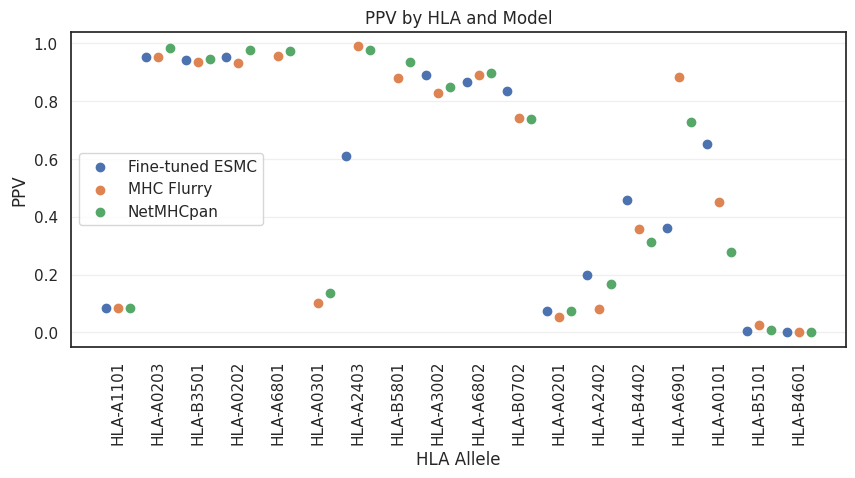

In [228]:
def plot_ppv_side_by_side(combined_df):
    # Extract unique categories for HLA and model.
    unique_HLA = combined_df['HLA'].unique()
    unique_models = combined_df['model'].unique()
    
    # Set up the figure size (adjust as needed).
    plt.figure(figsize=(10, 5))
    
    # We'll place each category (HLA) on an integer tick: 0, 1, 2, ...
    x_positions = np.arange(len(unique_HLA))
    
    # Compute horizontal offsets so each model is scattered side-by-side at each x-position.
    # For example, if there are 3 models, offsets might be [-0.2, 0.0, 0.2].
    n_models = len(unique_models)
    offsets = np.linspace(-0.3, 0.3, n_models)
    
    # Loop over each model and plot points with a distinct horizontal offset
    for offset, model in zip(offsets, unique_models):
        # Filter rows for this specific model
        subset = combined_df[combined_df['model'] == model]
        
        x_vals = []
        y_vals = []
        
        # Collect the PPV values for each HLA in the correct x-position
        for i, hla in enumerate(unique_HLA):
            # Subset further by HLA
            hla_subset = subset[subset['HLA'] == hla]
            # It's possible there are multiple rows per HLA if you store replicate info differently
            # so we plot them all. If there's only one row, it will simply add one point.
            for ppv_val in hla_subset['ppv'].values:
                x_vals.append(i + offset)
                y_vals.append(ppv_val)
        
        # Plot these points for the current model
        plt.scatter(x_vals, y_vals, label=model)
    
    # Set the x-ticks to the integer positions and label them with the HLA names
    plt.xticks(x_positions, unique_HLA, rotation=90)
    
    # Add some spacing at the bottom if labels are long
    plt.subplots_adjust(bottom=0.25)
    
    # Add labels and title
    plt.xlabel("HLA Allele")
    plt.ylabel("PPV")
    plt.title("PPV by HLA and Model")
    
    # Optionally add a light grid on the y-axis for clarity
    plt.grid(axis='y', alpha=0.3)
    
    # Add a legend
    plt.legend()
    
    # Show the figure
    plt.show()

# Example usage:
plot_ppv_side_by_side(combined_df)


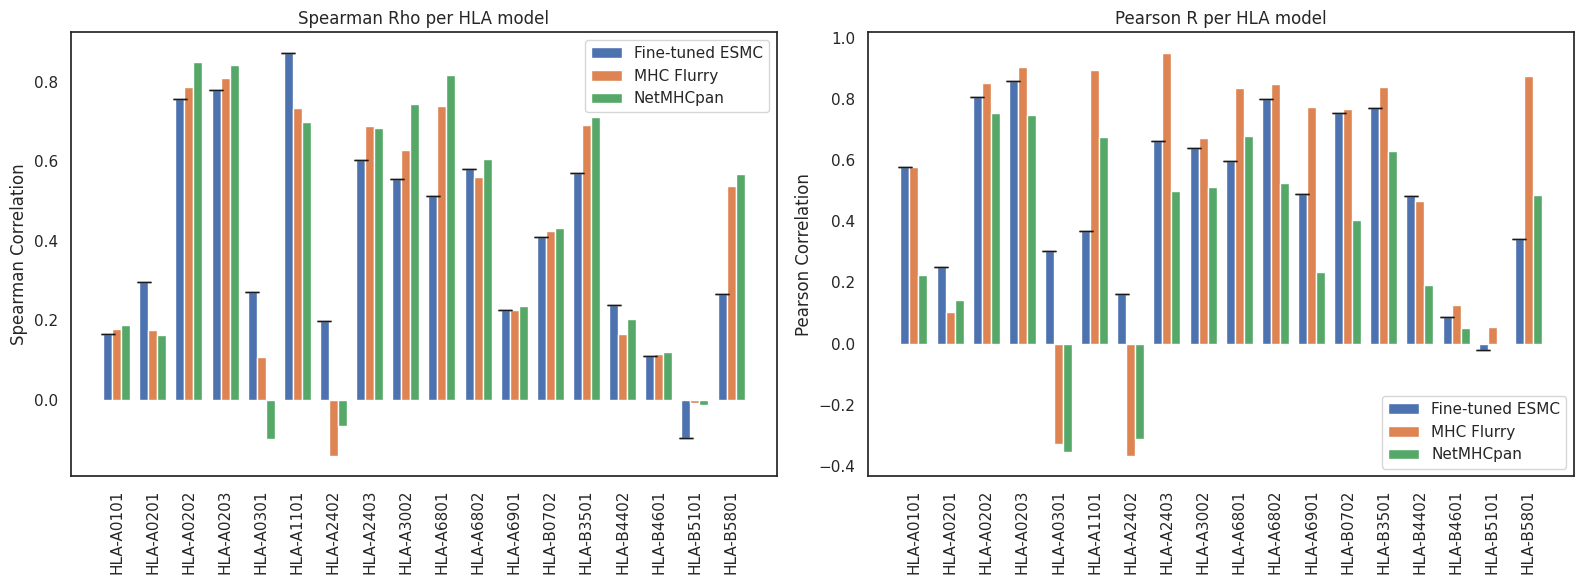

In [229]:
pivot_spearman     = combined_df.pivot(index='HLA', columns='model', values='spearman')
pivot_spearman_std = combined_df.pivot(index='HLA', columns='model', values='spearman_std')
pivot_pearson      = combined_df.pivot(index='HLA', columns='model', values='pearson')
pivot_pearson_std  = combined_df.pivot(index='HLA', columns='model', values='pearson_std')

# X-axis positions for each HLA.
x = np.arange(len(pivot_spearman.index))
width = 0.25  # Adjusted width to fit three bars

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Increased figure width to accommodate three bars

# Plot Spearman correlations:
# - Fine-tuned ESMC: with error bars from the aggregated data.
# - MHC Flurry: without error bars.
# - NetMHCpan: without error bars.
axes[0].bar(x - width, pivot_spearman['Fine-tuned ESMC'], width, 
            yerr=pivot_spearman_std['Fine-tuned ESMC'], capsize=5, label='Fine-tuned ESMC')
axes[0].bar(x, pivot_spearman['MHC Flurry'], width, label='MHC Flurry')
axes[0].bar(x + width, pivot_spearman['NetMHCpan'], width, label='NetMHCpan')
axes[0].set_xticks(x)
axes[0].set_xticklabels(pivot_spearman.index, rotation=90)
axes[0].set_ylabel('Spearman Correlation')
axes[0].set_title('Spearman Rho per HLA model')
axes[0].legend()

# Plot Pearson correlations:
# - Fine-tuned ESMC: with error bars from the aggregated data.
# - MHC Flurry: without error bars.
# - NetMHCpan: without error bars.
axes[1].bar(x - width, pivot_pearson['Fine-tuned ESMC'], width,
            yerr=pivot_pearson_std['Fine-tuned ESMC'], capsize=5, label='Fine-tuned ESMC')
axes[1].bar(x, pivot_pearson['MHC Flurry'], width, label='MHC Flurry')
axes[1].bar(x + width, pivot_pearson['NetMHCpan'], width, label='NetMHCpan')
axes[1].set_xticks(x)
axes[1].set_xticklabels(pivot_pearson.index, rotation=90)
axes[1].set_ylabel('Pearson Correlation')
axes[1].set_title('Pearson R per HLA model')
axes[1].legend()

plt.tight_layout()
plt.show()

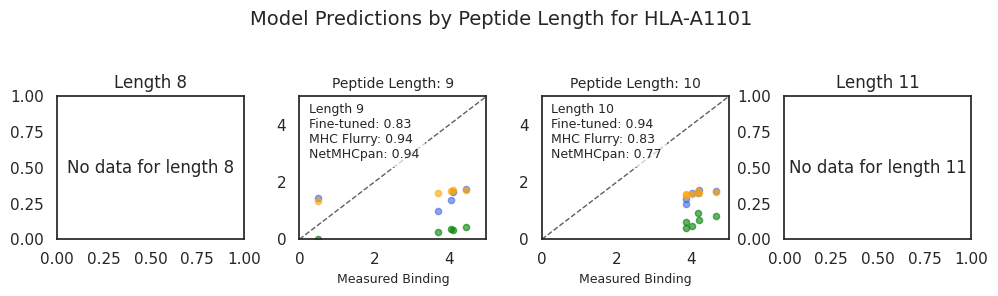

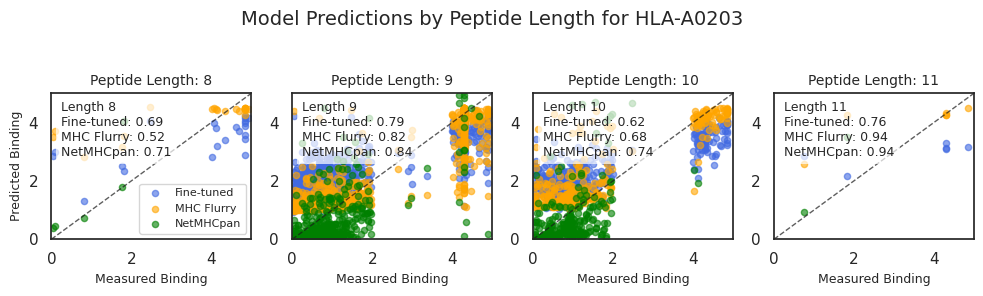

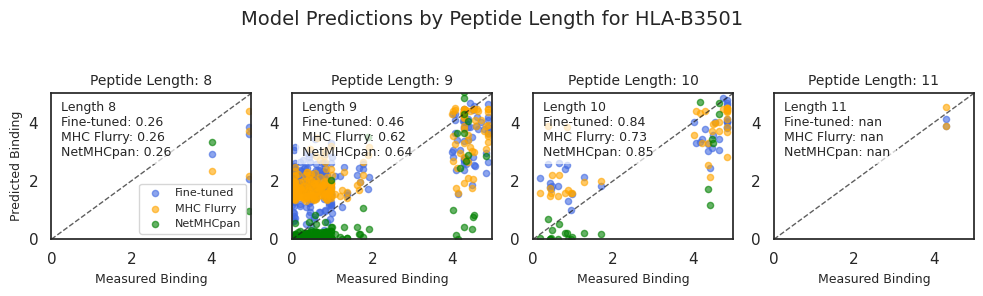

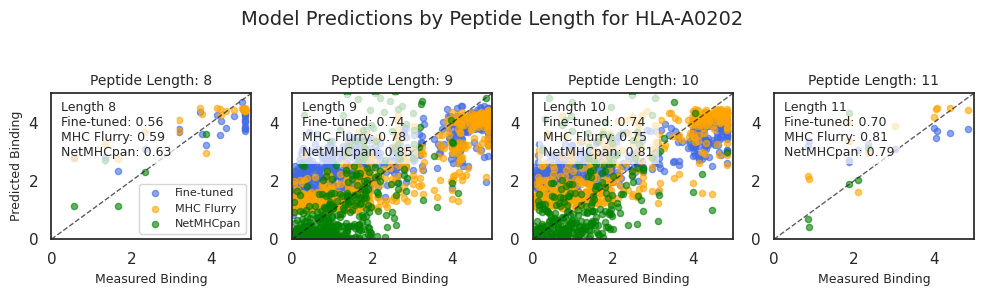

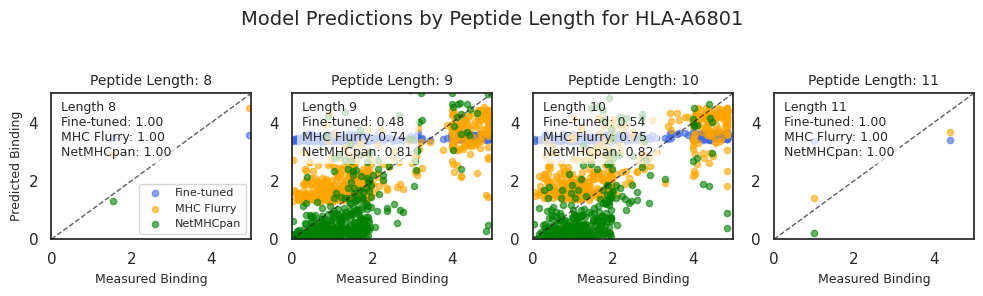

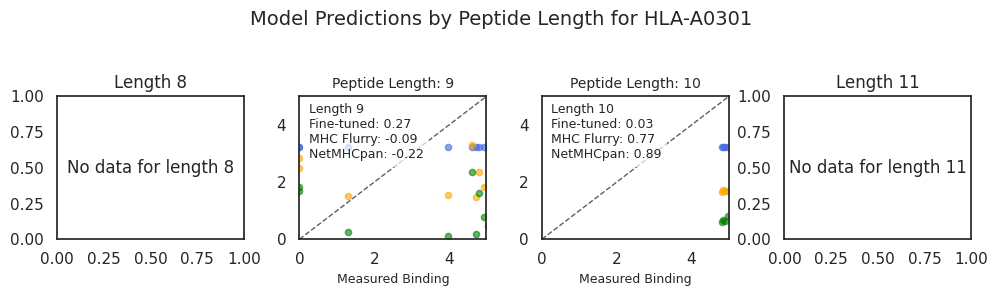

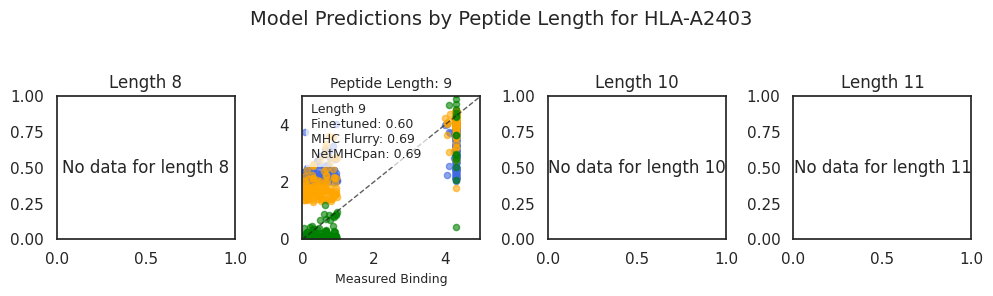

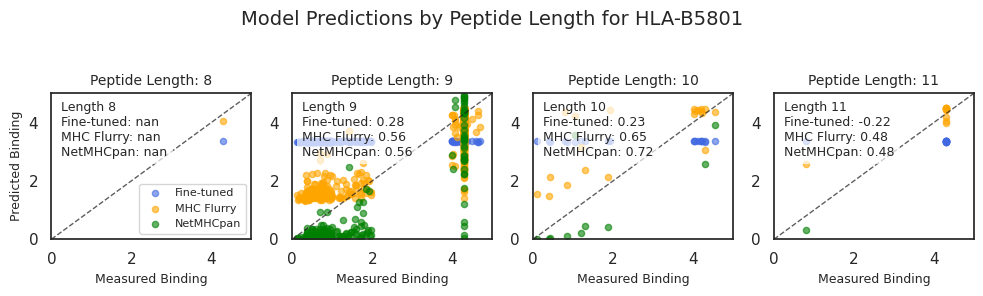

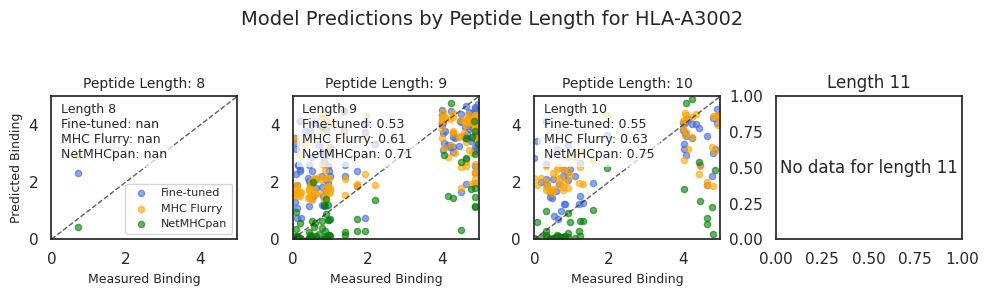

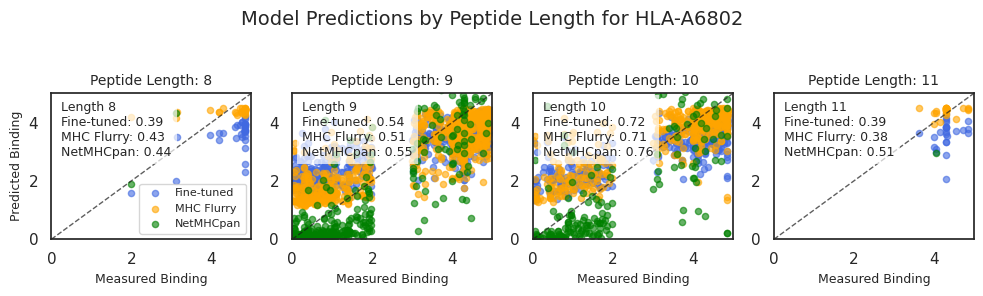

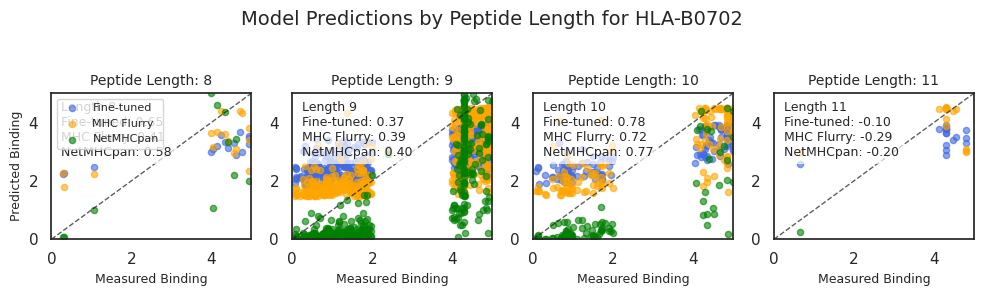

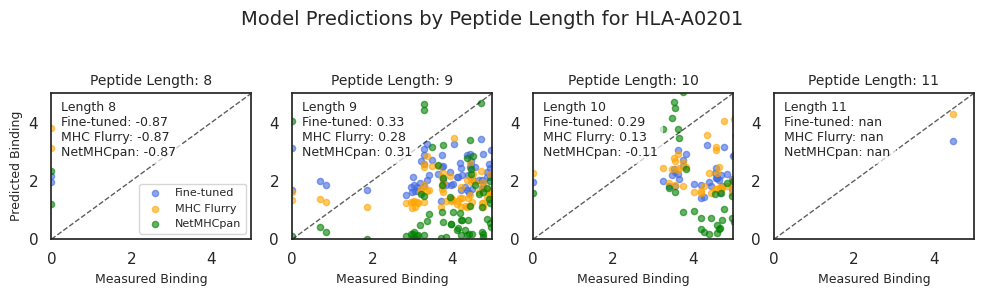

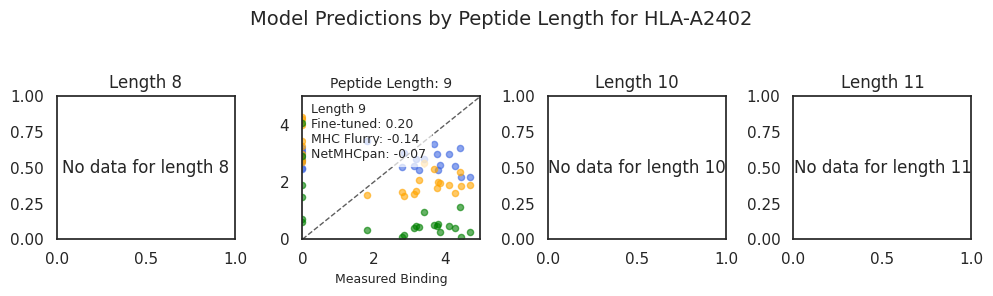

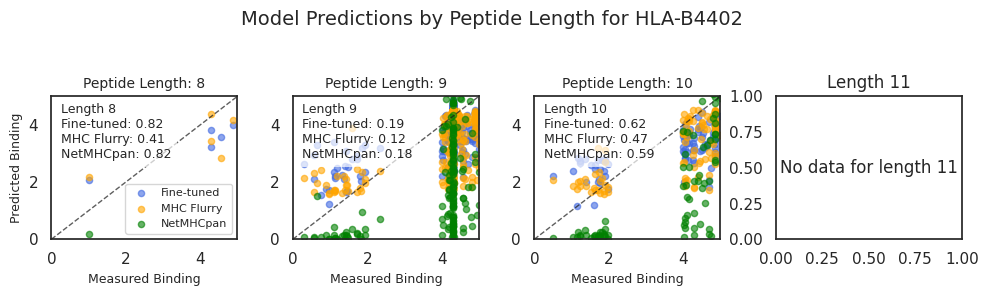

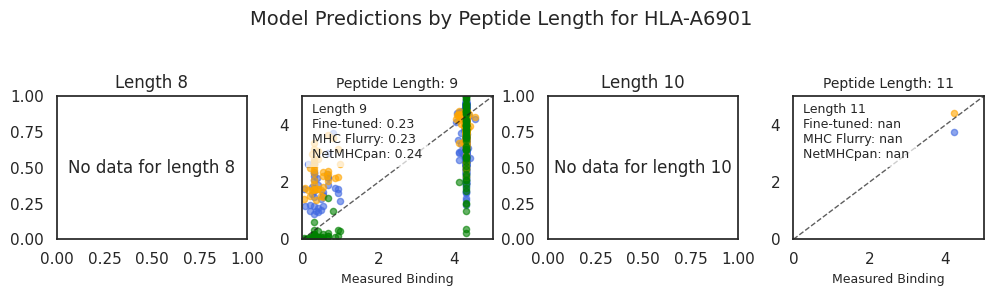

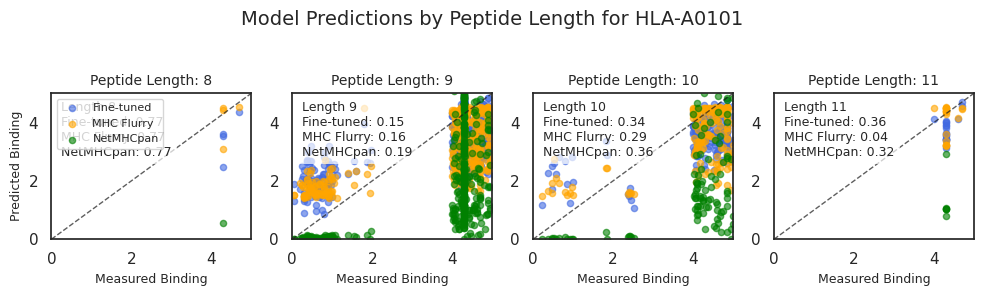

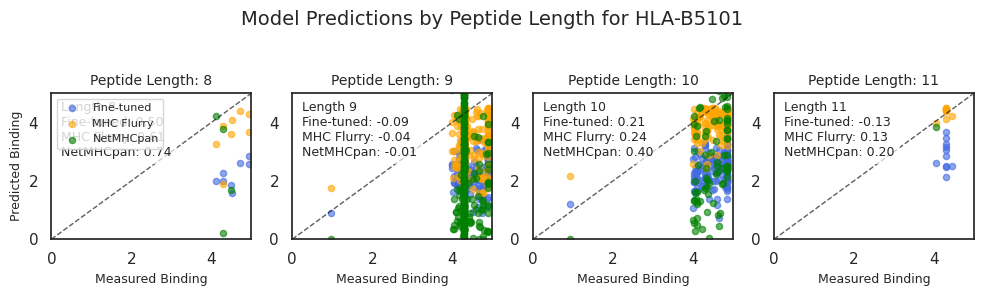

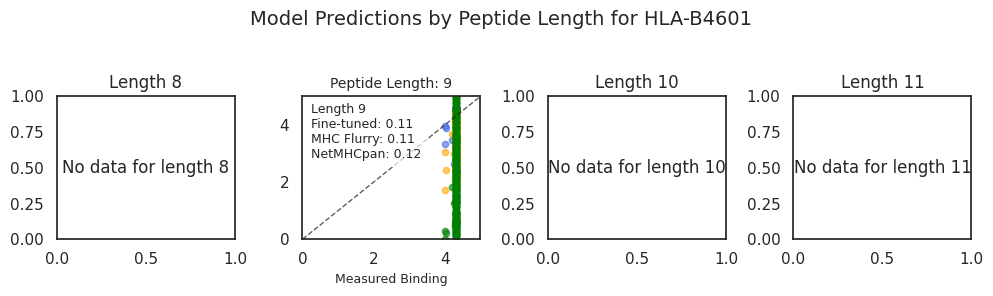

In [230]:
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

for HLA in merged_dfs_by_HLA.keys():
    predictions = merged_dfs_by_HLA[HLA]
    predictions['length'] = predictions['sequence'].str.len()
    
    fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex=False, sharey=False)  # Slightly wider figure for 3 models
    
    # Loop over the four peptide lengths.
    for idx, L in enumerate([8, 9, 10, 11]):
        ax = axes[idx]
        preds_length = predictions[predictions['length'] == L]
        if preds_length.empty:
            ax.text(0.5, 0.5, f"No data for length {L}", ha='center', va='center')
            ax.set_title(f"Length {L}")
            continue
            
        # Scatter plots:
        # Fine-tuned predictions
        ax.scatter(preds_length['measured'], preds_length['prediction'], 
                   color='royalblue', alpha=0.6, s=20, label='Fine-tuned')
        # MHC Flurry predictions (log-transformed)
        ax.scatter(preds_length['measured'], preds_length['mhc_log'], 
                   color='orange', alpha=0.6, s=20, label='MHC Flurry')
        # NetMHCpan predictions (log-transformed)
        ax.scatter(preds_length['measured'], preds_length['netmhc_log'], 
                   color='green', alpha=0.6, s=20, label='NetMHCpan')
        
        # Determine common limits for the x=y line.
        all_vals = np.concatenate([
            preds_length['measured'].values, 
            preds_length['prediction'].values,
            preds_length['mhc_log'].values,
            preds_length['netmhc_log'].values
        ])
        min_val, max_val = np.min(all_vals), np.max(all_vals)
        pad = (max_val - min_val) * 0.05
        lims = [min_val - pad, max_val + pad]
        ax.plot([0, 5], [0, 5], 'k--', alpha=0.7, lw=1)
        ax.set_xlim([0, 5])
        ax.set_ylim([0, 5])
        
        # Compute Spearman correlations for each model.
        sp_finetuned, _ = spearmanr(preds_length['measured'], preds_length['prediction'])
        sp_mhc, _       = spearmanr(preds_length['measured'], preds_length['mhc_log'])
        sp_netmhc, _    = spearmanr(preds_length['measured'], preds_length['netmhc_log'])
        
        # Annotate the panel with Spearman correlation values.
        annotation = (f"Length {L}\n"
                      f"Fine-tuned: {sp_finetuned:.2f}\n"
                      f"MHC Flurry: {sp_mhc:.2f}\n"
                      f"NetMHCpan: {sp_netmhc:.2f}")
        ax.text(0.05, 0.95, annotation, transform=ax.transAxes,
                verticalalignment='top', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        ax.set_title(f"Peptide Length: {L}", fontsize=10)
        if idx == 0:
            ax.set_ylabel("Predicted Binding", fontsize=9)
        ax.set_xlabel("Measured Binding", fontsize=9)
        if idx == 0:
            ax.legend(fontsize=8)
    
    fig.suptitle(f"Model Predictions by Peptide Length for {HLA}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the figure with the HLA name in the specified folder.
    save_path = f'/global/scratch/users/sergiomar10/data/figures_presentation/{HLA}.png'
    # plt.savefig(save_path, dpi=300)
    # plt.close(fig)
    plt.show()